In [243]:
text_string = """

Form 13F Information Table Entry Total:                 659
                                        ---------------------------------------
    sdsfsdfdsfd  Form 13F  dfdfdsf dfds3454354
                                                     2,403,697
Form 13F Information Table Value Total: -------------------------------------- 1,456 1456 Form 13F
                                                    (thousands) $2,403,697
Form 13F Information Table Total Value: -------------------------------------- 1,456 1456
                                                    (thousands) $2,403,697.00
 """

cast_to_bytecode = text_string.encode() # decodes into bytecode `.decode('utf-8')`
text_raw = fr"{text_string}" # encodes string to raw text. Pretty cool tip on use `fr` together. Never seen it before

In [244]:
# text_raw
text_string
# text_string.encode()

'\n\nForm 13F Information Table Entry Total:                 659\n                                        ---------------------------------------\n    sdsfsdfdsfd  Form 13F  dfdfdsf dfds3454354\n                                                     2,403,697\nForm 13F Information Table Value Total: -------------------------------------- 1,456 1456 Form 13F\n                                                    (thousands) $2,403,697\nForm 13F Information Table Total Value: -------------------------------------- 1,456 1456\n                                                    (thousands) $2,403,697.00\n '

In [274]:
import re
string = """
abc-1000?der 

How about a NO! or 20 times NO.
"""
string2 = """dgsfdgsdg dfgdsfg "30",2014-08-08,"100","MT","8","3624","#","#",1"""
string3 = """dgsfdgsdg dfgdsfg, 30 2014-08-08, 100 MT 8 3624 # # 1
How about a NO! or 20 times NO."""
string4 = """0828041930	72	0:5493513263615:1:1	0:3513263615:2:1	0:5491124970159:1:1		0	9	14	841	SMPP.841:1	1.0	0	0	"""

# \d - digit in the string
# \d+ - matches all individual full digits/words with digits only, but it also means 1,345,555 is extracted as ['1', '345', '555']
# \d* - as `\d+` plus every white space "" in the string ['',  '','','','1', '','','659','','', ''] etc
# \D - Negation of the `\d`. 1st non-digit. Not [0-9].
# \w -  letter, digit or _ but not digits. `\w{3,}?`: limits to any 3 or more starting chars. `\w{3,}` to words with 3 or more chars 
# \W - negation of `\w`
# \s - white space
# \S - character that is anythin but white space
# . - character except the new line
# \n
re.findall(r"(?:\s*(?:\"([^\"]*)\"|([^\s]+))\s*\s?)+?", string3) # extracts every standalone whole word/character
re.findall(r"(?:\s*(?:\"([^\"]*)\"|([^,]+))\s*,?)+?", string3) # extracts every standalone whole word/character separated by ","
re.findall(r"Entry Total\W+([0-9]{0,5})", text_string) # extracts digits in a line that starts with "Entry Total"
re.findall(r"(?:[^\t]+\s|\t|\w$)", string4) # extracts data separated by tabs
re.findall(r"\$?\s?(\$?\d+[\.\s,\dk]+)|(\d+[\.\s,\dk]+\$?)", text_string) # extracts data separated by tabs
re.findall(r"Value Total(:)?\W+([0-9,?\s?]{0,10})", text_string) # extracts digits in a line that starts with "Entry Total"
re.findall(r"(?:un)?expected", "a few unexpected words are to be expected")
re.findall(r"(?:un|not )?expected", "unexpected and not expected should both be matched")
# re.findall(r"(?:Value Total|Total Value)\W+?[\d+,?\d+?]", text_string)
re.findall(r"(?:Value Total|Total Value)", text_string) # () treats the selection as a unit
re.findall(r"[0-9A-Za-z\-]+", text_string) # [] is like a list of values to match. It can be any order and values are independent
re.findall(r"([\d,.?]+)", text_string)
re.findall(r"(?<!\n) Form 13F", text_string) # matches every "Form 13F" but not if on new line
re.findall(r"(?<!\n) Form 13F", text_string) # matches every "Form 13F" but not if on new line



# re.search(r"\D.*", fr'{string}', re.DOTALL).group()

[' Form 13F', ' Form 13F']

In [263]:
fr"{text_string}"
# text_raw
print(text_string)

'\n\nForm 13F Information Table Entry Total:                 659\n                                        ---------------------------------------\n    sdsfsdfdsfd  Form 13F  dfdfdsf dfds3454354\n                                                     2,403,697\nForm 13F Information Table Value Total: -------------------------------------- 1,456 1456 Form 13F\n                                                    (thousands) $2,403,697\nForm 13F Information Table Total Value: -------------------------------------- 1,456 1456\n                                                    (thousands) $2,403,697.00\n '

## Real Python Regex Course

<details><summary>(email text)</summary>
text = """
X-RP-State: 1095x{ar}y394<rnE>3a34<med>41a<aai>x{bb}y
MIME-Version: 1.0
Date: Sun, 18 Sep 1949
From: wile.e.coyote@desert.example.com
To: support@acme.example.com
Subject: suit failure

Content-Type: text/plain; charset="ASCII"

Dear sirs,

I'm writing to inform you of a drastic failure of your ACME Super Outfit. On Saturday, September 17, I endeavored to use your suit to achieve the dream of flight. I was beyond hopeful that my purchase from Acme Corporation would finally enable to capture my nemesis, the Road Runner.

I am confident that I used your Super Outfit according to the directions, as it is well known, I am a super-genius. After failing to achieve my goals
using a variety of mechanisms, including boomerang, a fake "School Crossing" sign, a rocket launcher, and a mural of a tunnel, I turned to your corporation's device. I was most disappointed at its failure, in fact, I uttered the oath "$#^!*" then screamed "Aaaaaaaaaah!" all the way to the ground.

Product information was as follows:

ACME Super Outfit
Model: 3990[X]\5
S/N: 9230413-3
Date of purchase: Friday September 15, 1949

Enclosed, please find an invoice for my hospital bills. The large fall was quite incapacitating.
"""
</details>

In [275]:
import re

In [281]:
question = "Lovely spam! Wonderful spam!"
re.search("spam", question)

<re.Match object; span=(7, 11), match='spam'>

In [283]:
question[7:11]

'spam'

In [285]:
match = re.search('spam', question)
bool(match)

True

In [286]:
match.span()

(7, 11)

In [287]:
match.start()

7

In [293]:
match.end()

11

In [294]:
match.string

'Lovely spam! Wonderful spam!'

In [296]:
re.match("spam", question) # re.match only matches the beginning of the string. Like `^` anchor
# it doesn't return anythink,because there is no "spam" at the beginnig of the sting

In [297]:
match = re.match('spam', question)


In [298]:
match

In [299]:
match is None


True

In [300]:
bool(match)

False

In [302]:
re.match("\w{5}", question)

<re.Match object; span=(0, 5), match='Lovel'>

In [303]:
match = re.fullmatch('spam', question)

In [304]:
match is None

True

In [307]:
re.fullmatch('((\w*\s*)*!)*', question)

<re.Match object; span=(0, 28), match='Lovely spam! Wonderful spam!'>

In [308]:
re.findall('[aeiou][^aeiou]', question)  # returns a list

['ov', 'el', 'am', 'on', 'er', 'ul', 'am']

In [309]:
re.finditer('[aeiou][^aeiou]', question)  # returns a list

In [311]:
[print(match) for match in re.finditer('[aeiou][^aeiou]', question) ]

<re.Match object; span=(1, 3), match='ov'>
<re.Match object; span=(3, 5), match='el'>
<re.Match object; span=(9, 11), match='am'>
<re.Match object; span=(14, 16), match='on'>
<re.Match object; span=(17, 19), match='er'>
<re.Match object; span=(20, 22), match='ul'>
<re.Match object; span=(25, 27), match='am'>


[None, None, None, None, None, None, None]

In [312]:
match = re.search(r'(\w+), (\w+)', 'one, two, three')
match.groups()

('one', 'two')

In [314]:
match.group(2)

'two'

In [315]:
match.group(2, 1)

('two', 'one')

In [316]:
match.group(0)

'one, two'

In [317]:
match[1]

'one'

In [318]:
match[0]

'one, two'

In [319]:
match.expand("second was '\\2', first was '\\1'")

"second was 'two', first was 'one'"

In [321]:
match = re.search('123', 'abc,123,xyz')
match

<re.Match object; span=(4, 7), match='123'>

In [322]:
match.start()

4

In [323]:
match.end()

7

In [324]:
match.string

'abc,123,xyz'

In [326]:
match = re.search(r'\w+\\\w+', r'one\two')

In [327]:
match.string

'one\\two'

In [328]:
content = "I count like this: one, two, three"
match = re.search(r"(\w+), (\w+), (\w+)", content)
match

<re.Match object; span=(19, 34), match='one, two, three'>

In [329]:
match.groups()

('one', 'two', 'three')

In [331]:

match = re.search(r"(?P<first>\w+), (?P<second>\w+), (?P<third>\w+)", content)

In [332]:
match.groups()

('one', 'two', 'three')

In [333]:
match.groupdict()

{'first': 'one', 'second': 'two', 'third': 'three'}

In [336]:
# non capturing group in the middle
match = re.search(r"(?P<first>\w+), (?:\w+), (?P<third>\w+)", content)
match.groups()

('one', 'three')

In [345]:
# reusing the group's name
content = "I count like this: one, one, three"
match = re.search(r"(?P<first>\w+), (?P=first), (?P<third>\w+)", content)
match.groups() # doesn't work for some reason

('one', 'three')

In [348]:
# non capturing group
string = "Idon't care if you dont'"
match = re.search(r"(a)(?:r)(e)", string)
match.groups()

('a', 'e')

In [369]:
# match = re.match(r"\d+", content).groups() # no matches
match = re.search(r"\d+", content)
match.groups() # doesn't find anything. I don't know why

matches = re.findall(r"\d+", content)
match # finds both digits

matches = re.finditer(r"\d+", content)
match = [match.group() for match in matches]
match # finds both digits

['13', '42']

In [370]:
content = "My favorite numbers are 13 and 42"
re.sub(r"\d+", "#", content)

'My favorite numbers are # and #'

In [372]:
re.sub(r"\d+", "#", content, count=1) # indicates that only the first match will be substituted

'My favorite numbers are # and 42'

In [374]:
re.sub(r"\d+", "#", content, count=2) # indicates that only the first match will be substituted

'My favorite numbers are # and #'

In [375]:
# use a function in sub
def reverse(match):
    return match.group(0)[::-1] # slice reverses the string

re.sub(r"\d+", reverse, content)

'My favorite numbers are 31 and 24'

In [379]:
# using back references for swapping matches
content = "My favorite numbers are 13 and 42"
re.sub(r"(\d+) and (\d+)", r"\2 and \1", content)

'My favorite numbers are 42 and 13'

In [380]:
# using back references for swapping matches
content = "My favorite numbers are 13 and 42"
re.sub(r"(\d+) and (\d+)", r"... and ...", content)

'My favorite numbers are ... and ...'

In [384]:
# using back references for swapping matches
content = "My favorite numbers are 13 and 42"
re.sub(r"(\d+) and (\1)", r"... and is the same", content) # if `\1` exists, the swapp happens, if there are no
# repeating matches, then no swap

'My favorite numbers are 13 and 42'

In [390]:
# re.sub(r"(\d+)", r"\10", "Is this a 1?") # error
re.sub(r"(\d+)", r"\g<1>0", "Is this a 1?") # substitute the match by itself plus `0`

'Is this a 10?'

In [392]:
re.sub(r"x*", "-", "spam") # `x*` zero or more x is substituted with `-`

'-s-p-a-m-'

In [394]:
re.subn(r"x*", "-", "spam") # `x*` zero or more x is substituted with `-`
# n show how many substitutins have happened

('-s-p-a-m-', 5)

In [395]:
re.split(r"\d+", "My favorite numbers are 13 and 42") # the matches are not included

['My favorite numbers are ', ' and ', '']

In [396]:
re.split(r"\d+", "My favorite numbers are 13 and 42", maxsplit=1)

['My favorite numbers are ', ' and 42']

In [397]:
re.split(r"(\d+)", "My favorite numbers are 13 and 42") # the matches ARE included

['My favorite numbers are ', '13', ' and ', '42', '']

In [400]:
re.findall(r"2^4", "Even more than 2^2 is 2^4") # nothing is found
regex = re.escape("2^2")
re.findall(regex, "Even more than 2^2 is 2^4") # now it's found!

['2^2']

In [403]:
digits_re = re.compile("(\d+)")
digits_re
digits_re.search("My favorite numbers are 13 and 42.")

<re.Match object; span=(24, 26), match='13'>

In [412]:
# import os
# os.system('notepad.exe ' + 'speed2.html')

0

In [415]:
re.findall(r"a+", "AAA")
re.findall(r"a+", "AAA", re.I) # flag ignorecase is activated

['AAA']

In [417]:
# multiline
re.findall(r"^I", "Yes, you did, no\nI didn't")
re.findall(r"^I", "Yes, you did, no\nI didn't", re.M)

['I']

In [419]:
re.findall(r"\AI", "Yes, you did, no\nI didn't", re.M) # no match as \A matches start of the whole string

[]

In [457]:
re.findall(r"1.2", "First 1\n2 next") # match anything between 1 and 2  # no match
re.findall(r"1.2", "First 1\n2 next", re.DOTALL | re.IGNORECASE) # the same but enabling newline match


['1\n2']

In [450]:
PHONE_REGEX = """
    (1\s)?      # optional leading 1
    \(\d\d\d\)  # aread code
    \s
    \d\d\d-     # prefix
    \d\d\d\d
"""
phone = re.compile(PHONE_REGEX, re.VERBOSE)
phone.findall("1 (416) 967-1111")
phone.match("1 (416) 967-1111").group()
phone.search("1 (416) 967-1111")[0]

'1 (416) 967-1111'

In [456]:
re.search("bacon, eggs", "bacon, eggs, and spam")[0]
re.search("bacon, eggs", "bacon, eggs, and spam", re.VERBOSE) # careful with verbose, sometimes we need to clearly
# specify \s
re.search("bacon,\s eggs", "bacon, eggs, and spam", re.VERBOSE)

<re.Match object; span=(0, 11), match='bacon, eggs'>

In [458]:
# flags inside the group
re.search("(?im)^i", "Yes, you did, no\nI didn't") # switches on the capital i

<re.Match object; span=(17, 18), match='I'>

In [462]:
# flags inside the group
re.findall("(?i:s)pam", "Spam, spam, spam, SPAM") # switches on the capital i

['Spam', 'spam', 'spam']

In [463]:
# conditional

r"(ACME)?\sSuper\s(?(1)(Out)|\w*(fit))" # if ACME is found, then select `Super` and `out` and if not, then
# select `Super` and any characters till and including `fit`

'(ACME)?\\sSuper\\s(?(1)(Out)|\\w*(fit))'

In [ ]:
# look ahead
r"writing\s(?=t)" # it checks for `writing t`, but it doesn't select the `t` itself. It just checks if it exists

In [ ]:
# look ahead
r"\d{4}(?=\[\w\])" # 4 digits followded by `[\w]`
r"\d{4}(?!=\[\w\])" # negative lookahead # does not followed by `[\w]`

In [ ]:
# look behind
r"(?<=\d{4})\[\w\]" # checks if there are 4 digits before the `[\w]` and selects it, but doesn't select the digits,
# only checks their existence

In [ ]:
# negative look behind
r"(?<!\d\d)\d\d" # 2 digits NOT preceded by 2 digits

In [464]:
# comments inside regex
r"(\d{4})(?#four digits)" # anything inside `(?#four digits)` is ignored 

'(\\d{4})(?#four digits)'

In [465]:
from pathlib import Path

In [545]:
%%time
import os
directory = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_00_TEST_676_CIK_TXT\936944")

for file in directory.glob("*."):
    f = file.read_text().splitlines()
    # [input("click yes after sorting the file") for line in f if not line.find("0000936944")]
    # [os.system("notepad.exe "+ file.as_posix()) for line in f if line.find("0000936944")]

# if file.read_text().find("0000936944"):
#     os.system("notepad.exe "+ file.as_posix())


CPU times: total: 0 ns
Wall time: 0 ns


In [574]:
# file.read_text().find("0000936944")
len(list(directory.glob("*-03-*.*")))

6

### Tutorial **Regex-In-Python** from github
https://github.com/nikhilkumarsingh/RegEx-In-Python/blob/master/02.%20import%20re.ipynb

In [575]:
pattern = re.compile("hello")

In [576]:
pattern

re.compile(r'hello', re.UNICODE)

In [577]:
pattern = re.compile("hello", flags=re.I)

In [578]:
pattern

re.compile(r'hello', re.IGNORECASE|re.UNICODE)

In [583]:
pattern = re.compile("hello")
match = pattern.match("hello world") # `.match` check matches on the beginning of the string
match.span()
match.start()
match.end()


5

In [588]:
pattern.match("say hello to the world", pos=4) is None

False

In [590]:
pattern.match("say hello to the world") is None

True

In [589]:
pattern.match("hello", pos=4) is None

True

In [592]:
pattern.search("say hello")

<re.Match object; span=(4, 9), match='hello'>

In [598]:
pattern.search("say hello hello") # `.search()` checks for the first match only

<re.Match object; span=(4, 9), match='hello'>

In [600]:
pattern.findall("say hello hello") # `.search` checks for ALL the matches and returns a list

['hello', 'hello']

In [614]:
matches = pattern.finditer("say hello hello") # checks for ALL the matches and returns an interator of match objects
matches

In [615]:
# [print(match.span()) for match in matches] 
[print(match.group()) for match in matches] 

hello
hello


[None, None]

In [617]:
from regex_utils import highlight_regex_matches
highlight_regex_matches(pattern, "say hello hello")

say hello hello


In [618]:
re.match("hello", "hello")

<re.Match object; span=(0, 5), match='hello'>

In [619]:
re.findall("hello", "say hello hello")

['hello', 'hello']

In [620]:
txt = "This book costs $15."

In [625]:
pattern = re.compile("\$15")
pattern.search(txt)
# pattern.match(txt)

<re.Match object; span=(16, 19), match='$15'>

In [626]:
import re
from regex_utils import highlight_regex_matches

In [642]:
txt = """
Yesterday, I was driving my car without a driving licence. The traffic police stopped me and asked me for my 
license. I told them that I forgot my licence at home. 
"""

In [643]:
pattern = re.compile("licen[sc]e")
pattern.findall(txt)

['licence', 'license', 'licence']

In [644]:
highlight_regex_matches(pattern, txt)


Yesterday, I was driving my car without a driving licence. The traffic police stopped me and asked me for my 
license. I told them that I forgot my licence at home. 



In [672]:
txt = """
The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
but CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.

CONFORMED PERIOD OF REPORT:	20031231
FILED AS OF DATE:		20040129
EFFECTIVENESS DATE:		20040129
"""

In [655]:
# pattern = re.compile("[1-9][0-9][0-9][0-9]")
pattern = re.compile("[1-9]\d\d\d")
pattern.findall(txt)

['2008',
 '2009',
 '2018',
 '2010',
 '2011',
 '2013',
 '2015',
 '2017',
 '2003',
 '1231',
 '2004',
 '2004']

In [656]:
highlight_regex_matches(pattern, txt)


The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.

CONFORMED PERIOD OF REPORT:	20031231
FILED AS OF DATE:		20040129
EFFECTIVENESS DATE:		20040129



In [ ]:
# negate the character set
pattern = re.compile("[^aeiou]")
pattern.findall(txt)

In [657]:
re.findall("[^\w\s]", txt)

['(', ')', '.', '.', '(', ')', '.', '.', '(', ')', ',', '.', ':', ':', ':']

In [668]:
txt = """
C:\Windows
C:\Python
C:\Windows\System32
"""

In [669]:
pattern = re.compile("C:\Windows\System32")
pattern.search(txt)

In [670]:
pattern = re.compile("C:\\\\Windows\\\\System32")
pattern.search(txt)

<re.Match object; span=(22, 41), match='C:\\Windows\\System32'>

In [671]:
pattern = re.compile(r"C:\\Windows\\System32")
pattern.search(txt)

<re.Match object; span=(22, 41), match='C:\\Windows\\System32'>

In [673]:
txt = """
The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
but CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.

CONFORMED PERIOD OF REPORT:	20031231
FILED AS OF DATE:		20040129
EFFECTIVENESS DATE:		20040129
"""

In [674]:
pattern = re.compile("and|or|the|but")
pattern.findall(txt)

['and', 'but', 'the', 'and', 'the', 'and']

In [675]:
highlight_regex_matches(pattern, txt)


The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
but CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.

CONFORMED PERIOD OF REPORT:	20031231
FILED AS OF DATE:		20040129
EFFECTIVENESS DATE:		20040129



In [676]:
txt = """
What is your name?
Who is that guy?
"""

In [678]:
pattern = re.compile("What|Who is")
pattern.findall(txt)


['What', 'Who is']

In [680]:
highlight_regex_matches(pattern, txt)


What is your name?
Who is that guy?



In [683]:
pattern = re.compile("(What|Who) is")
pattern.findall(txt)
list(pattern.finditer(txt))

[<re.Match object; span=(1, 8), match='What is'>,
 <re.Match object; span=(20, 26), match='Who is'>]

In [682]:
highlight_regex_matches(pattern, txt)


What is your name?
Who is that guy?



In [700]:
txt = """
Report Summary:

Number of Other Included Managers:                       0
                                        ---------------------------------------

Form 13F Information Table Entry Total:                 659
                                        ---------------------------------------
                                                     2,403,697
Form 13F Information Table Value Total: --------------------------------------
                                                    (thousands)

List of Other Included Managers:
"""

In [702]:
pattern = re.compile("(?:Value|Entry) Total")
# the `?:` in this context tells Python's regex library to not consider the parentheses as defining a capture.
# (It's still used for grouping of course.) This way .findall() will behave as .finditer()
pattern.findall(txt),list(pattern.finditer(txt))
# highlight_regex_matches(pattern, txt)

(['Entry Total', 'Value Total'],
 [<re.Match object; span=(185, 196), match='Entry Total'>,
  <re.Match object; span=(388, 399), match='Value Total'>])

In [703]:
txt = """
I have 2 dogs. One dog is 1 year old and other one is 2 years old. Both dogs are very cute! 
"""

In [714]:
pattern = re.compile("dogs?")
pattern.findall(txt)
highlight_regex_matches(pattern, txt)


I have 2 dogs. One dog is 1 year old and other one is 2 years old. Both dogs are very cute! 



In [719]:
txt = """
file1.txt
file_one.txt
file.txt
fil.txt
not.txt
file.xml
file-1.txt
"""

In [720]:
pattern = re.compile("file[\w-]*\.txt")
pattern.findall(txt)

['file1.txt', 'file_one.txt', 'file.txt', 'file-1.txt']

In [721]:
highlight_regex_matches(pattern, txt)


file1.txt
file_one.txt
file.txt
fil.txt
not.txt
file.xml
file-1.txt



In [722]:
txt = """
file1.txt
file_one.txt
file09.txt
fil.txt
file23.xml
file.txt
"""

In [723]:
pattern = re.compile("file\d+\.txt")
pattern.findall(txt)

['file1.txt', 'file09.txt']

In [724]:
highlight_regex_matches(pattern, txt)


file1.txt
file_one.txt
file09.txt
fil.txt
file23.xml
file.txt



In [725]:
txt = """
The first season of Indian Premiere League (IPL) was played in 2008. 
The second season was played in 2009 in South Africa. 
Last season was played in 2018 and won by Chennai Super Kings (CSK).
CSK won the title in 2010 and 2011 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.
"""

In [726]:
pattern = re.compile("\d{4}")
pattern.findall(txt)

['2008', '2009', '2018', '2010', '2011', '2013', '2015', '2017']

In [727]:
txt = """
123143
432
5657
4435
54
65111
"""

In [735]:
pattern = re.compile("\d{4,}")
pattern.findall(txt)

['123143', '5657', '4435', '65111']

In [759]:
txt = """
555-555-5555
555 555 5555
5555555555
"""

In [760]:
# pattern = re.compile("\d+[-\s]?\d+[-\s]?\d+")
pattern = re.compile(r"\d{3}[-\s]?\d{3}[-\s]?\d{4}") # same as above but specifies the # of digits
pattern.findall(txt)

['555-555-5555', '555 555 5555', '5555555555']

#### Greedy \ Non-greedy

In [761]:
txt = """<html><head><title>Title</title><>"""

In [762]:
pattern = re.compile("<.*>") # greedy, will match the longes match possible
pattern = re.compile(r"<.*?>") # non-greedy will search for the smallest match. Enabled with `?` after quantifier
pattern.findall(txt)

['<html>', '<head>', '<title>', '</title>', '<>']

#### Boundary Matchers


In [3]:
txt = r"""
Lorem Ipsum is simply dummy text of the printing and typesetting industry. 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, Lorem ad Ipsum
bla bla Lorem
when an unknown printer took a galley of type and scrambled it to make a type specimen book. 
It has survived not only five centuries, Lorem Ipsum but also the leap into electronic typesetting, 
remaining essentially unchanged. Lorem ad Ipsum
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem ad Ipsum.
Report Summary:

Number of Other Included Managers:                       0
                                        ---------------------------------------

Form 13F Information Table Entry Total:                 659
                                        ---------------------------------------
                                                     2,403,697
Form 13F Information Table Value Total: --------------------------------------
                                                    (thousands)

List of Other Included Managers:
"""

In [948]:
pattern = re.compile("and|or|the")
pattern = re.compile(r"\b(and|or|the)")
##--------------------
pattern = re.compile(r"(?:Entry Total:?)(?:\s*\d.*\s*)(?:Value Total:?)", re.DOTALL|re.I) # whatever is between two strings, even across new lines
# pattern = re.compile(r"(?<=Entry Total:?)", re.DOTALL|re.I) # whatever is between two strings, even across new lines

##-------------------------------------
# pattern = re.compile(r"^Lorem", flags=re.M) # matches only at the BEGINNING of the line
# pattern = re.compile(r"(?<=[^\n])Lorem", flags=re.M) # matches NOT at the beginning of the line
##-------------------------------------
# pattern = re.compile(r"Lorem$", flags=re.M) # matches pattern ONLY at the END of the line
# pattern = re.compile(r"Lorem(?=[^\n])", flags=re.M) # matches NOT at the END Of the line
# pattern = re.compile(r"(?<=[^\n])Lorem(?=[^\n])", flags=re.M) # matches NOT at the END or BEGINNING Of the line
##-------------------------------------
# pattern = re.compile(r"(?<=[^\n])Lorem(?=\sad)", flags=re.M) # matches NOT new line and followed by `ad`
# pattern = re.compile(r"(?<=[^\n])Lorem(?=(\s)(?!\sad))", flags=re.M) # matches NOT new line and NOT followed by " " and "ad"
###----------------------------------- 
# pattern = re.compile(r"(?:Lorem Ipsum)(?:.*?)(?:Lorem ad Ipsum)", flags=re.M|re.DOTALL) # group between strings - greedy
# pattern = re.compile(r"(Lorem Ipsum)(.*?)(Lorem ad Ipsum)", flags=re.M|re.DOTALL) # group between strings - non-greedy
# above are two types of presenting results: 1. with the search strings `from` and `to` included. 2. just what's between them,
# but also separately the list presents the values for the individual search strings `from` and `to` 
pattern.findall(txt)
# highlight_regex_matches(pattern, txt)

['Entry Total:                 659\n                                        ---------------------------------------\n                                                     2,403,697\nForm 13F Information Table Value Total:']

In [57]:
# experiments with my text. start: select 200 chars before "Entry Total"
# end: select 200 chars after "Value Total", then concat these texts together
start = re.compile(r"(?:^.{1,200})(?:Entry Total:?)(?:.{1,400}$)", flags=re.M|re.DOTALL)
end = re.compile(r"(?:Value Total:?)(?:.{1,200}$)", flags=re.M|re.DOTALL)
pattern = re.compile(fr"{start}{end}")
print((start.findall(txt)+end.findall(txt))[0], sep="\n")

# match = re.search(pattern, txt)

# if match:
#     selected_lines = match.group("selected")
#     print(selected_lines)

Report Summary:

Number of Other Included Managers:                       0
                                        ---------------------------------------

Form 13F Information Table Entry Total:                 659
                                        ---------------------------------------
                                                     2,403,697
Form 13F Information Table Value Total: --------------------------------------
                                                    (thousands)

List of Other Included Managers:



In [64]:
set(start.findall(txt)[0].splitlines()).symmetric_difference(end.findall(txt)[0].splitlines())

# txt

{'                                                     2,403,697',
 '                                        ---------------------------------------',
 'Form 13F Information Table Entry Total:                 659',
 'Form 13F Information Table Value Total: --------------------------------------',
 'Number of Other Included Managers:                       0',
 'Report Summary:',
 'Value Total: --------------------------------------'}

In [100]:
def validate_usr(username):
    # print(username.find(" "))
    import re
    # passwd = 'Geek12@'
    # reg = "^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@$!%*#?&])[A-Za-z\d@$!#%*?&]{6,20}$" validate password
    pattern = re.compile(r"\b([a-z\d_]){4,16}")
    match = re.findall(pattern, username)
    print(match)
    if match: return True
    else: return False

In [145]:
# from codewars 
# Write a simple regex to validate a username. Allowed characters are:
# lowercase letters,numbers, underscore
# Length should be between 4 and 16 characters (both included).

def validate_usr(username):
    return bool(re.match(r'^[a-z0-9_]{4,16}$', username)) # using ^ and $ makes sure, the entire string doesn't have
# white spaces. Another way of doing it is to add and if statement `username.find(" ") == -1`
# or
def validate_usr(username):
    return re.match(r'^[a-z0-9_]{4,16}$', username) != None
    # return re.match(r'^(?=[^_\-\s])[A-Za-z\d@$!#%*?&]{4,16}$', username) != None # needs more testing, but seems to work
    # (?=[^_\-\s]) explicitly states there can't be "_", "-" or white space in the string
# validate_usr('asd43 34')
validate_usr('asd43_45')
validate_usr('asd43 45')
validate_usr('asd4345')
validate_usr('asd43@45')



False

In [116]:
# validating password that ca nonly  have certain characters # [A-Za-z\d@$!#%*?&]{6,20}
def main():
	passwd = 'Geek12@'
	reg = "^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[@$!%*#?&])[A-Za-z\d@$!#%*?&]{6,20}$"
    # (?=.*[a-z]) - positive lookahead that check the match has at least one LOWER case
    # (?=.*[A-Z]) - positive lookahead, checks the match has at least one UPPER case
    # (?=.*\d) - positive lookahead that check the match has at least one DIGIT case
    # (?=.*[@$!%*#?&]) - positive lookahead that check the match has at least one of cpecial characters
	
	# compiling regex
	pat = re.compile(reg)
	
	# searching regex				
	mat = re.search(pat, passwd)
	
	# validating conditions
	if mat:
		print("Password is valid.")
	else:
		print("Password invalid !!")

# Driver Code	
if __name__ == '__main__':
	main()


Password invalid !!


In [146]:
txt = """
Name:
Age: 0
Roll No.: 15
Grade: S

Name: Ravi
Age: -1
Roll No.: 123 Name: ABC
Grade: K

Name: Ram
Age: N/A
Roll No.: 1
Grade: G
"""

In [175]:
# find all the lines in the given text which start with the pattern Name:.
pattern = re.compile(r"^Name:.*", flags=re.M) # this option matches all lines. `r"^Name:.*"` matches only 
# the ones where there is something behind "Name:"
# pattern = re.compile("^Name: \w+", flags=re.M)
match = pattern.findall(txt)
match

['Name:', 'Name: Ravi', 'Name: Ram']

In [176]:
txt = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s!
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages
More recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."""

In [191]:
# Find all the sentences which DO NOT end with a full stop (.) in the given text.
pattern = re.compile(r".+[^\.]$", flags=re.M)
match = pattern.findall(txt)
match
highlight_regex_matches(pattern,txt)


Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s!
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages
More recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.


#### Splitting with re

In [2]:
txt = """Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated."""

In [3]:
# Pattern match is not included in any of the substrings obtained after splitting.
pattern = re.compile("\n")
pattern.split(txt)

['Beautiful is better than ugly.',
 'Explicit is better than implicit.',
 'Simple is better than complex.',
 'Complex is better than complicated.']

In [24]:
import re
pattern = re.compile("\W") # split by everything that is not a alphanumeric + _
pattern.split(txt)

[x for x in pattern.split(txt) if x.split()]
list(filter(lambda x: x, pattern.split(txt)))

['Beautiful',
 'is',
 'better',
 'than',
 'ugly',
 'Explicit',
 'is',
 'better',
 'than',
 'implicit',
 'Simple',
 'is',
 'better',
 'than',
 'complex',
 'Complex',
 'is',
 'better',
 'than',
 'complicated']

In [27]:
pattern = re.compile("\W") # split by everything that is not a alphanumeric + _
pattern.split(txt, maxsplit=3) # to split only first three words 

['Beautiful',
 'is',
 'better',
 'than ugly.\nExplicit is better than implicit.\nSimple is better than complex.\nComplex is better than complicated.']

#### Substitutions

In [31]:
txt = "100 cats, 23 dogs, 3 rabbits, 45trouts"

In [34]:
pattern = re.compile(r"\b\d+\b") # only match and substitute if the digit is an individual word
pattern.sub("-", txt)

'- cats, - dogs, - rabbits, 45trouts'

In [35]:
pattern.subn("-", txt) # show how many substitutions took place

('- cats, - dogs, - rabbits, 45trouts', 3)

#### Flags

In [36]:
txt = """
The best thing about regex is that it makes the task of string manipulation so easy.
"""

In [38]:
pattern = re.compile("the", flags=re.I)
pattern

re.compile(r'the', re.IGNORECASE|re.UNICODE)

In [39]:
from regex_utils import highlight_regex_matches

highlight_regex_matches(pattern, txt)


The best thing about regex is that it makes the task of string manipulation so easy.



In [56]:
# multiline
txt = """
A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.
"""

In [61]:
pattern = re.compile("^A.*", flags=re.M)
pattern = re.compile("^[A\s.]*", flags=re.S) # in txt above the very firts line is actually empty
# so we need to add "\s" or "." to it and enable re.DOTALL/re.S
highlight_regex_matches(pattern, txt)


A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.



In [65]:
# re.DOTALL
pattern = re.compile(r"car.+", flags=re.S)
pattern = re.compile(r"car.+")
highlight_regex_matches(pattern, txt)


A man was crossing the road.
Suddenly, a car passed before him in a very high speed.
He was terrified
And shocked.



In [66]:
# re.UNICODE
txt = "मुझे किताबें पढ़ना बहुत पसंद है।"

In [67]:
pattern = re.compile(r"\W+")
pattern.findall(txt)

['ु', 'े ', 'ि', 'ा', 'ें ', '़', 'ा ', 'ु', ' ', 'ं', ' ', 'ै।']

In [69]:
import regex # DIFFERENT MODULE!!!
# we're doing this because in re. there is a bug related to UNICODE 

In [70]:
pattern = regex.compile("\w+")
pattern.findall(txt)

['मुझे', 'किताबें', 'पढ़ना', 'बहुत', 'पसंद', 'है']

In [71]:
chars =  ''.join(chr(i) for i in range(256))
print(chars)

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


#### Groupping

In [80]:
txt = "abbbbbabbbb"

In [84]:
pattern1 = re.compile(r"ab+")
pattern2 = re.compile(r"(ab)+")
highlight_regex_matches(pattern1, txt)
highlight_regex_matches(pattern2, txt)

abbbbbabbbb
abbbbbabbbb


In [85]:
txt = """
my name is ram
my name is sam
"""

In [89]:
pattern = re.compile(r"name is (ram|sam)")
pattern = re.compile(r"name is ram|sam")
highlight_regex_matches(pattern, txt)



my name is ram
my name is sam



In [90]:
# Capturing group

txt = "12/02/2019" 

In [148]:
pattern = re.compile("(\d{2})\/(\d{2})\/(\d{4})")
matches = list(pattern.finditer(txt))
[match.groups() for match in matches]

[('12', '02', '2019')]

In [128]:
[match.group(1) for match in match]

['12']

In [129]:
[match.group(2) for match in match]

['02']

In [141]:
day, month, year = sum([[match.group(1), match.group(2), match.group(3)] for match in matches], [])

import itertools
day, month, year = list(itertools.chain(*[[match.group(1), match.group(2), match.group(3)] for match in matches]))
day, month, year

('12', '02', '2019')

In [158]:
# Capturing group

txt = "12/02/2019" 
pattern = re.compile("(\d{2})\/(\d{2})\/(\d{4})")
match = pattern.match(txt)
match.groups()
day, month, year = match.groups()
day, month, year

('12', '02', '2019')

In [160]:
txt = """
Name: Nikhil
Age: 0
Roll No.: 15
Grade: S

Name: Ravi
Age: -1
Roll No.: 123
Grade: K

Name: Ram
Age: N/A
Roll No.: 1
Gra
"""

In [162]:
pattern = re.compile(r"Name: (.+)\n")
matches = pattern.findall(txt)
matches

['Nikhil', 'Ravi', 'Ram']

In [163]:
txt = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry.
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s!
It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged.
It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages
More recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum."""

In [174]:
pattern = re.compile(r"Lorem (.+)$", flags=re.M)
matches = pattern.findall(txt)
matches

['Ipsum is simply dummy text of the printing and typesetting industry.',
 "Ipsum has been the industry's standard dummy text ever since the 1500s!",
 'Ipsum passages',
 'Ipsum.']

#### Backreferencing

In [187]:
txt = """
hello hello
how are you
bye bye
"""

In [188]:
pattern = re.compile(r"(\w+)\s\1")
pattern.findall(txt)

['hello', 'bye']

In [224]:
# find all dates with the format dd/mm/yyyy and change them to yyyy-mm-dd format.
txt = """
today is 23/02/2019.
yesterday was 22/02/2019.
tomorrow is 24/02/2019.
"""

In [225]:
import re
pattern = re.compile(r"(\d{2})/(\d{2})/(\d{4})")
pattern.findall(txt)



[('23', '02', '2019'), ('22', '02', '2019'), ('24', '02', '2019')]

In [226]:
# new = pattern.sub(r"\3-\2-\1", txt)
new = re.sub(pattern, r"\3-\2-\1", txt)
print(new)


today is 2019-02-23.
yesterday was 2019-02-22.
tomorrow is 2019-02-24.



#### Named Groups

In [227]:
txt = "Nikhil Kumar"

In [242]:
pattern = re.compile(r"(?P<first>\w+) (?P<last>\w+)")
match = pattern.match(txt)
match.group('first')
match.group('last') 

'Kumar'

In [246]:
# swap first and last names
pattern.sub(r"\g<last> \g<first>", txt)
new_txt = re.sub(pattern, r"\g<last> \g<first>", txt) # same as above, but clearer
new_txt

'Kumar Nikhil'

In [279]:
# check if a person has the same first and last name
txt = "Jhonson Jhonson"

pattern = re.compile(r"(?P<first>\w+) (?P=first)")

# pattern.findall(txt)
# pattern.match(txt).group()
# pattern.fullmatch(txt).group()
# [match.group() for match in pattern.finditer(txt)]



1

In [279]:
# check if a person has the same first and last name
txt = "Jhonson Jhonson"

pattern = re.compile(r"(?P<first>\w+) (?P=first)")

# pattern.findall(txt)
# pattern.match(txt).group()
# pattern.fullmatch(txt).group()
# [match.group() for match in pattern.finditer(txt)]



1

#### Non-matching groups

In [282]:
txt = """
i love cats
i love dogs
"""

In [290]:
pattern = re.compile("I love (cats|dogs)", flags=re.I)

pattern.findall(txt)

['cats', 'dogs']

In [291]:
for match in pattern.finditer(txt):
    print("Complete regex match (default):", match.group(0))
    print("Match captured by 1st group:", match.group(1))

Complete regex match (default): i love cats
Match captured by 1st group: cats
Complete regex match (default): i love dogs
Match captured by 1st group: dogs


In [295]:
# with non-capturing groups the match object will not have any group, so we can only use group()
pattern = re.compile("I love (?:cats|dogs)", flags=re.I)
[match.group() for match in pattern.finditer(txt)]

['i love cats', 'i love dogs']

#### Look Around, Positive / Negative Look ahead, Positive / Negative Look behind
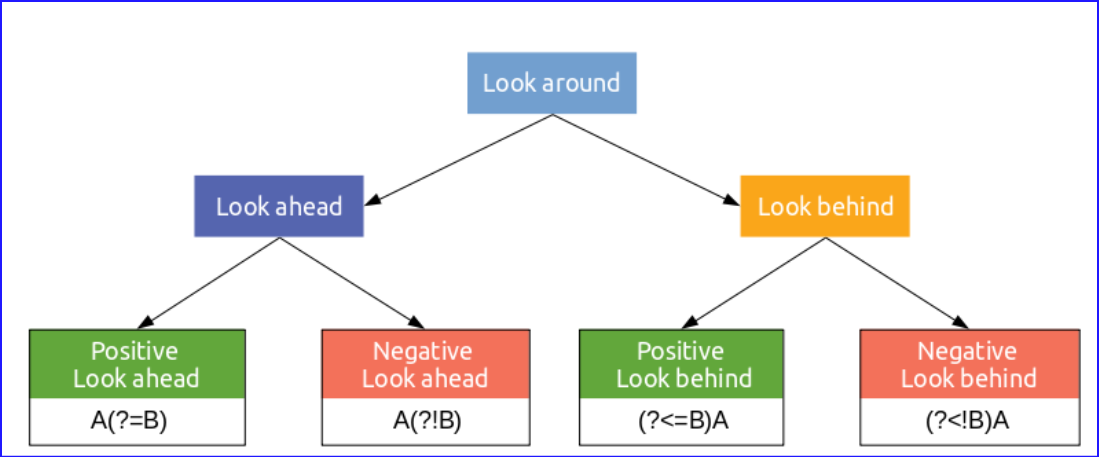

##### Look Ahead

In [297]:
txt = "i love python, i love regex"

In [299]:
pattern =re.compile(r"love regex")
match = pattern.search(txt)
match.span()

(17, 27)

In [300]:
pattern.findall(txt)

['love regex']

In [301]:
highlight_regex_matches(pattern, txt)

i love python, i love regex


In [302]:
# positive look ahead: match "love" only if it's followed by " regex"
pattern = re.compile(r"love(?=\sregex)") 
match = pattern.search(txt)
match.span()

(17, 21)

In [303]:
highlight_regex_matches(pattern, txt)

i love python, i love regex


In [306]:
# another example of a positive look ahead
# find all words in given text ONLY IF are followed by `.` or `,`

txt = "My favorite colors are red, green, and blue."
pattern = re.compile(r"\w+(?=[\.,])")
# pattern = re.compile(r"\w+(?=\.|,)") # the same as above
match = pattern.search(txt)
match
highlight_regex_matches(pattern, txt)

My favorite colors are red, green, and blue.


In [309]:
# negative look ahead: match "love" only if it is NOT followed by " regex"
txt = "i love python, i love regex"

pattern = re.compile(r"love(?!\sregex)") 
match = pattern.search(txt)
match.span()

(2, 6)

In [308]:
highlight_regex_matches(pattern, txt)

i love python, i love regex


##### [ ] **Look Behind**


In [312]:
# Positive Look behind
# find a match for "regex" in the given text only if it is preceded by "love" or "hate".
txt = "love regex or hate regex, can't ignore regex"
pattern = re.compile(r"(?<=(love|hate)\s)regex")
highlight_regex_matches(pattern, txt)

love regex or hate regex, can't ignore regex


In [313]:
# Negative Look behind
# find a match for "regex" in the given text only if it is NOT preceded by "love" or "hate".
pattern = re.compile(r"(?<!(love|hate)\s)regex")
highlight_regex_matches(pattern, txt)

love regex or hate regex, can't ignore regex


#### Other

In [322]:
# check if the passed character is a digit 
def is_digit(n):
    return bool(re.fullmatch(r'\d', n))

is_digit("13")

False

In [327]:
txt = "pop momn"
bool(re.fullmatch(r'pop', txt))
# fullmatch() checks the pattern against the whole of the string. An equivalent is
bool(re.match(r'pop momn\Z', txt))

####
# `match()` checks only at the new line/beginning of the string

True

In [330]:
# codewars
# substitute every character in text with char if chacarter in text is not empty
def contamination(text, char):
    pattern = re.compile(r"[\d\w/]")
    if text:
        return re.sub(pattern, fr"{char}", text)
    else:
        return text
# other better options
# def contamination(text, char):
#   return re.sub(".", char, text)
################
def contamination(text, char):
    return char*len(text)
###########################


In [334]:
# test.assert_equals(contamination("abc","z"), "zzz")
# test.assert_equals(contamination("","z"), "")
# test.assert_equals(contamination("abc",""), "")
# test.assert_equals(contamination("_3ebzgh4","&"), "&&&&&&&&")
# test.assert_equals(contamination("//case"," "), "      ")
contamination("//case"," ")
contamination("","z")

''

In [339]:
# Write a function that accepts an array of 10 integers (between 0 and 9), 
# that returns a string of those numbers in the form of a phone number.
# create_phone_number([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]) # => returns "(123) 456-7890"

In [342]:
import re
def create_phone_number(n):
    pattern = re.compile(r"^(\d{3})(\d{3})(\d{4})$")
    phone = re.sub(pattern, r"(\1) \2-\3", "".join(map(str, n)) )
    return phone

create_phone_number([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
create_phone_number([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

###################### solution #1 form codewars 
def create_phone_number(n):
	return "({}{}{}) {}{}{}-{}{}{}{}".format(*n)
create_phone_number([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
#####################



'(111) 111-1111'

In [ ]:
# Digital root is the recursive sum of all the digits in a number.

# Given n, take the sum of the digits of n. If that value has more than one digit, continue reducing in this way until a single-digit number is produced. The input will be a non-negative integer.

#     16  -->  1 + 6 = 7
#    942  -->  9 + 4 + 2 = 15  -->  1 + 5 = 6
# 132189  -->  1 + 3 + 2 + 1 + 8 + 9 = 24  -->  2 + 4 = 6
# 493193  -->  4 + 9 + 3 + 1 + 9 + 3 = 29  -->  2 + 9 = 11  -->  1 + 1 = 2

In [415]:

def digital_root(n):
    pattern = re.compile(r"\d+")
    match = pattern.match(str(n))
    # if n < 10: return n
    droot = sum(list(map(int, match.group())))
    while len(str(droot)) != 1:
        droot = sum(list(map(int, str(droot))))
    return droot

digital_root(23344)

7

In [418]:
# top result from codewars. It uses recursion. It feel like a beautiful solution
def digital_root(n):
    return n if n < 10 else digital_root(sum(map(int,str(n))))

digital_root(2334)

3

In [476]:
# Numbers ending with zeros are boring.They might be fun in your world, but not here.
# Get rid of them. Only the ending ones.
# 1450 -> 145
# 960000 -> 96
# 1050 -> 105
# -1050 -> -105

def no_boring_zeros(n):
    pattern = re.compile(r"(0+$)")
    match = pattern.search(str(n))
    if n == 0 or not match: return n
    else: return int(re.sub(pattern, r"", str(n)))

no_boring_zeros(-1060)

-106

In [486]:
# top solution from codewars
def no_boring_zeros(n):
    return int(str(n).strip("0")) if n else n # or `rstrip("0")`
# no_boring_zeros(-1060)
# no_boring_zeros(0)
# no_boring_zeros(106)
# no_boring_zeros(10600000)
no_boring_zeros(-135346454)

-135346454

In [489]:
"Tram Via".lstrip("Via")
"sfsdf".

'Tram Via'

In [542]:
# implement a function that calculates the sum of the integers inside a string. 
# string "The30quick20brown10f0x1203jumps914ov3r1349the102l4zy dog", the sum of the integers is 3635.

# (\d+) matches every full number in a string, it's greedy. (10, 20, 30, etc..) 
# (\d+?) is non-greedy and will match each individual digit (1, 0, 2, 0, 3, 0, etc...)
def sum_of_integets_in_string(s):
    s = re.sub(r"\D+", ",", s)
    s = re.sub(r"(^\D+|\D+$)", "", s)
    return sum(list(map(int,s.split(",")))) if s else 0

    # print(bool(s))
    
    


sum_of_integets_in_string("The30quick20brown10f0x1203jumps914ov3r1349the102l4zy dog")
sum_of_integets_in_string("12.4")
sum_of_integets_in_string("C4t5 are 4m4z1ng.")
sum_of_integets_in_string("Dogs are our best friends.")

#"Dogs are our best friends."


0

In [535]:
### best solution from codewars
def sum_of_integers_in_string(s):
    return sum(int(x) for x in re.findall(r"(\d+)", s))


3635

In [56]:
from pathlib import Path
import re

l = ['947822/0000905718-00-000053.txt',
 '947822/0000905718-00-000188.txt',
 '947822/0000905718-00-000190.txt',
 '947822/0000905718-00-000267.txt',
 '947822/0000905718-00-000376.txt',
 '947822/0000905718-01-000053.txt',
 '947822/0000905718-99-000320.txt',
 '947822/0000905718-99-000429.txt',
 '947822/0000905718-99-000525.txt']

In [73]:
from regex_utils import highlight_regex_matches

In [110]:
lines = working_text.splitlines()
for index, line in enumerate(lines):
    pattern_v_total = re.compile(r"((Value Total|Total Value)\s*(:?))", flags=re.I)
    match_v_total = pattern_v_total.search(line)
    if match_v_total:
        highlight_regex_matches(pattern_v_total, line)
        pattern_v_total_amnt = re.compile(r"((Value Total|Total Value)\s*(:?).*\d+)", flags=re.I)
        match_v_total_amnt = pattern_v_total_amnt.search(line)
        if match_v_total_amnt:
            highlight_regex_matches(pattern_v_total_amnt, line)
        else:
            pattern_next_line_amnt = re.compile(r"(.*(\d+))", flags=re.I)
            match_next_line_amnt = pattern_next_line_amnt.search(lines[index+1])
            if match_next_line_amnt:
                highlight_regex_matches(pattern_next_line_amnt,lines[index+1])
                updated_line = match_v_total.group()+match_next_line_amnt.group() 
                print(updated_line)
                updated_text = re.sub(pattern_v_total,updated_line, text)
                

Form 13F Information Table Value Total: 
   $130,850   (thousands)
Value Total:   $130,850


In [106]:
updated_line

'Value Total:   $130,850'

In [ ]:
# print(text)
print(updated_text)

In [124]:
%%time

filings_676_txt = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_00_TEST_676_CIK_TXT")
cik = '947822'
files = filings_676_txt.rglob(f"{cik}/*.txt")  # -03-000131

for file in files:
    if f"{cik}/"+file.name in l:
        text = file.read_text()
        # select text 200 tokens befire and 200 after the "Entry Total" and work with it
        pattern = re.compile(r"(?:^.{1,200})(?:Entry Total:?)(?:.{1,400}$)", flags=re.M|re.DOTALL)
        working_text = (pattern.findall(text)[0])
        # print(working_text, sep="\n")
      
        lines = working_text.splitlines()
        for index, line in enumerate(lines):
            pattern_v_total = re.compile(r"((Value Total|Total Value)\s*(:?))", flags=re.I)
            match_v_total = pattern_v_total.search(line)
            if match_v_total:
                pattern_v_total_amnt = re.compile(r"((Value Total|Total Value)\s*(:?).*\d+)", flags=re.I)
                match_v_total_amnt = pattern_v_total_amnt.search(line)
                if match_v_total_amnt:
                    continue
                else:
                    pattern_next_line_amnt = re.compile(r"(.*(\d+))", flags=re.I)
                    match_next_line_amnt = pattern_next_line_amnt.search(lines[index+1])
                    if match_next_line_amnt:
                        updated_line = match_v_total.group()+match_next_line_amnt.group() 
                        updated_text = re.sub(pattern_v_total,updated_line, text)
                        # print(updated_text[3500:6000], "#" * 10, sep="\n")
                        file.write_text(updated_text)


CPU times: total: 141 ms
Wall time: 136 ms


In [121]:
match.group()


'Entry Total:                 926\n                                        ---------------------------------------\n                                                       1,950,893\nForm 13F Information Table Value Total'

In [130]:
text = """
Number of Other Included Managers:           0*

- --------------------------------------------------------------------------------

Form 13F Information Table Entry Total:      21

- --------------------------------------------------------------------------------

Form 13F Information Table Value Total:   $173,121
   $173,121   (thousands)
- -------------
Form 13F Information Table Total Entry :      21

Form 13F Information Table Total Value :   $173,121

"""
pattern = re.compile(r"(Entry Total|Total Entry(:)?).*", flags = re.M|re.I)
match_entry_total = pattern.search(text)
highlight_regex_matches(pattern, text)


Number of Other Included Managers:           0*

- --------------------------------------------------------------------------------

Form 13F Information Table Entry Total:      21

- --------------------------------------------------------------------------------

Form 13F Information Table Value Total:   $173,121
   $173,121   (thousands)
- -------------
Form 13F Information Table Total Entry :      21

Form 13F Information Table Total Value :   $173,121




In [173]:
import re
from pathlib import Path
import os, sys

filings_676_txt = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_00_TEST_676_CIK_TXT")
# files = filings_676_txt.rglob("*.txt")  
files = filings_676_txt.rglob("7789/*.txt") 
bad_filings = []
to_correct_filings = []
for file in files:
    if re.search(r"7789", file.name):
        # print(file)
        text = file.read_text()
                    
        if not re.search(r'<?xml', text, flags= re.S|re.I|re.M):
            if not re.search(r"Total Value|Value Total(:?)", text, flags= re.S|re.I|re.M):
                bad_filings.append(file)
                if re.search(r"FINAL TOTALS", text, flags= re.S|re.I|re.M):
                    to_correct_filings.append(file)
                    # updated_text = re.sub(r"FINAL TOTALS",r"Value Total", text)
                    # file.write_text(updated_text)
                    # print(updated_text[-200:-1], "#" * 10, sep="\n")
                    
                if re.search(r"COLUMN TOTALS", text, flags= re.S|re.I|re.M):
                    matches = re.findall(r"COLUMN TOTALS.*", text, flags= re.I)
                    to_correct_filings.append(file)
                    # updated_text = re.sub(r"FINAL TOTALS",r"Value Total", text)
                    # file.write_text(updated_text)
                    # print(updated_text[-200:-1], "#" * 10, sep="\n")
                    
                    # [print(match) for match in matches]
                    print(file)
                    column_totals = sum([int(re.sub(r'\D', '', match)) for match in matches])
                    # value_total
                        
                # os.system("notepad.exe "+ file.as_posix())
                # i = input("did you check the opened file without 'Value Total'?... yes or no")
                # if i == "yes":
                #     print(f"file: {file} is finished")
                # else: sys.exit()
            
                
        

In [175]:
len(bad_filings)
len(to_correct_filings)
# column_totals

0

In [ ]:
%%time
import re
from pathlib import Path
import pandas as pd
import os, sys

###
df_processed = pd.read_parquet("df_processed.parquet")
filings_processed = [tuple(x) for x in df_processed.itertuples(index=False, name=None)]
###
df_to_correct = pd.read_parquet("df_to_correct.parquet")
filings_to_correct = [tuple(x) for x in df_to_correct.itertuples(index=False, name=None)]
###
no_entry_section = {'file': [], 'status': []}
no_value_section = []

filings_676_txt = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_00_TEST_676_CIK_TXT")
files = filings_676_txt.rglob("*.txt")  
files_list = list(filings_676_txt.rglob("*.txt"))

for index, file in enumerate(files_list[:1000]):  
    if file.name in df_to_correct.file.to_list():
        print(file.name)
        text = file.read_text()
        # select text 200 tokens befire and 200 after the "Entry Total" and work with it
        value_pattern = re.compile(r"(?:^.{1,200})(Total Value|Value Total\s?:?)(?:.{1,400}$)",\
                                   flags=re.M|re.DOTALL)
        entry_pattern = re.compile(r"(?:^.{1,200})(Total Entry|Entry Total\s?:?)(?:.{1,400}$)", flags=re.M|re.DOTALL)
        if entry_pattern.findall(text) and value_pattern.findall(text):
            working_text = (entry_pattern.findall(text)[0])
            no_entry_section['file'].append(file.name)
            no_entry_section['status'].append('yes_entry_yes_value_section')

        elif (not entry_pattern.findall(text)) and (not value_pattern.findall(text)):
            no_entry_section['file'].append(file.name)
            no_entry_section['status'].append('no_entry_no_value_section')
            print(f"No Entry or Value sections")
            # os.system("notepad.exe "+ file.as_posix())
            os.system("C:\Program Files\LibreOffice\program\soffice.bin "+ file.as_posix())
            i = input("did you correct both Entry and Value Total?... yes or no")
            if i == "yes":
                print(f"file: {file} is finished")
                no_entry_section['file'].append(file.name)
                no_entry_section['status'].append('yes_entry_yes_value_section')
            else: 
                no_entry_section['file'].append(file.name)
                no_entry_section['status'].append('no_entry_no_value_section')
                sys.exit()
                
        elif (not entry_pattern.findall(text)) and value_pattern.findall(text):
            working_text = (value_pattern.findall(text)[0])
            no_entry_section['file'].append(file.name)
            no_entry_section['status'].append('no_entry_yes_value_section')
            print(f"No Entry but with Value sections")
            # os.system("notepad.exe "+ file.as_posix())
            os.system("C:\Program Files\LibreOffice\program\soffice.bin "+ file.as_posix())
            i = input("did you correct both Entry and Value Total?... yes or no")
            if i == "yes":
                print(f"file: {file} is finished")
                no_entry_section['file'].append(file.name)
                no_entry_section['status'].append('yes_entry_yes_value_section')
            else: 
                no_entry_section['file'].append(file.name)
                no_entry_section['status'].append('no_entry_yes_value_section')
                sys.exit()
                
        elif entry_pattern.findall(text) and (not value_pattern.findall(text)):
            working_text = (entry_pattern.findall(text)[0])
            no_entry_section['file'].append(file.name)
            no_entry_section['status'].append('yes_entry_no_value_section')
            print(f"With Entry but no Value sections")
            # os.system("notepad.exe "+ file.as_posix())
            os.system("C:\Program Files\LibreOffice\program\soffice.bin "+ file.as_posix())
            i = input("did you correct both Entry and Value Total?... yes or no")
            if i == "yes":
                print(f"file: {file} is finished")
                no_entry_section['file'].append(file.name)
                no_entry_section['status'].append('yes_entry_yes_value_section')
            else: 
                no_entry_section['file'].append(file.name)
                no_entry_section['status'].append('yes_entry_no_value_section')
                sys.exit()

            
        # try:
        #     working_text = (entry_pattern.findall(text)[0])
        # except:
        #     os.system("notepad.exe "+ file.as_posix())
        #     i = input("did you check the opened file without 'Value Total'?... yes or no")
        #     if i == "yes":
        #         print(f"file: {file} is finished")
        #     else: sys.exit()
        # print(working_text, sep="\n")

In [333]:
f = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_01_TEST_676_CIK_CSV_REDUCED\2230-0000002230-00-000003.csv")
# os.system("notepad.exe "+ f.as_posix())

# tad = Path(r"C:\Users\yo_fanpc\AppData\Local\Programs\Tad\Tad.exe")
# libre = Path(r"C:\Program Files\LibreOffice\program\soffice.exe")
# os.system(f"{libre} "+ f.as_posix())
os.system(f"code "+ f.as_posix())

0

In [ ]:
pd.DataFrame.from_records(no_entry_section)

In [334]:
TR_01_TEST_676_CIK_CSV_REDUCED = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_01_TEST_676_CIK_CSV_REDUCED")
filings_676_txt = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_00_TEST_676_CIK_TXT")


In [ ]:
files = list(TR_01_TEST_676_CIK_CSV_REDUCED.glob("*.csv"))[0]
for csv in files:
    print(f"openning CSV file:... {csv.name} in vscode", sep="\n")
    os.system("code "+ csv.as_posix())
    txt_file = Path(filings_676_txt,f'{csv.name.split("-")[0]}/{"-".join(csv.name.split("-")[1:]).split(".")[0]}.txt')
    print(f"openning TXT file:... {csv.name} in notepad", sep="\n")
    os.system("notepad.exe "+ txt_file.as_posix())
    i = input("did you check and close both files?... yes or no")
    if i == "yes":
        print(f"file: {csv} is corrected")

    else: 

        sys.exit()

In [364]:
csv = Path(r"1000097-0000919574-00-000478.csv")
list(filings_676_txt.rglob(f'{csv.name.split("-")[0]}/{csv.name.split(".")[0]}*.txt'))

[]

In [360]:
csv.name.split(".")[0]
f'{csv.name.split("-")[0]}/{"-".join(csv.name.split("-")[1:]).split(".")[0]}.txt'

'1000097/0000919574-00-000478*.txt'

In [371]:
l = Path(filings_676_txt,f'{csv.name.split("-")[0]}/{"-".join(csv.name.split("-")[1:]).split(".")[0]}.txt')
os.system("notepad.exe "+ l.as_posix())

0

In [ ]:
%%time
# Checking value data
from pathlib import Path
import shutil
import pandas as pd
import polars as pl
import pandera as pa

selected_cik = [2230,3520,5272,7195,7789,9015,10742,14661,16972,18349,18748,19475,19617,21175,22657,24386,35442,35527,36066,36104,36644,36966,38777,39263,40417,40545,44365,45319,49205,50863,51762,51812,51964,52234,53417,59558,59951,60086,61227,67698,70858,71210,71259,72971,73124,80255,84616,89014,92230,93751,98758,102212,102909,105495,108572,200217,201772,216851,276101,310051,312348,313028,313807,314949,314957,314984,315014,315032,315038,315054,315066,315080,315157,315297,315498,316011,318989,320335,320376,351051,351173,351262,354204,356264,700529,704051,707179,712537,713676,714142,720672,723204,728083,728100,728618,732905,733020,740272,740913,741073,743127,750641,754811,757657,759944,762152,763212,763848,764068,764106,764112,764529,764532,765443,769317,769954,769963,775368,776867,778963,779519,788714,790354,790502,791191,791490,796848,799003,799004,801051,806097,807249,807985,808722,809339,809443,810265,810384,810386,810672,810716,811360,811454,813917,813933,814133,814375,816788,819535,820027,820123,820124,820289,820478,820743,821197,822581,823621,825293,829407,831001,831571,836372,837592,842782,842941,846222,846633,846788,846797,850401,850529,852743,854157,857508,859872,860486,860561,860580,860585,860643,860644,860645,860662,860748,860828,860857,861176,861177,861462,861787,862469,866361,866842,868491,869178,869179,869353,869367,872080,872163,872259,872573,872732,873630,874791,877134,877338,878228,881432,883511,883677,883782,883790,883803,883961,883965,884300,884314,884414,884423,884541,884546,884548,884566,884589,885062,885415,886982,887402,887777,887818,889232,891287,891478,893738,894205,894300,894309,895213,895421,897070,897378,897599,898358,898382,898399,898413,899211,900169,900529,900973,902219,902367,902464,902584,903064,903944,903947,903949,905567,905591,905608,906304,908195,909151,909661,911274,912938,914933,914976,915287,915325,916542,917579,918893,919079,919185,919192,919458,919489,919497,919530,919538,919859,920440,920441,921531,921669,922127,922439,922898,922940,923093,923116,923469,924166,924171,924181,926688,926833,926834,928047,928196,928566,928568,928633,930441,931097,932024,932974,933429,934639,934999,936698,936753,936936,936941,936944,937394,937522,937589,937615,937760,937886,938076,938206,938487,938582,938592,938759,939219,940445,941560,943719,944234,944804,945625,945631,947822,947996,948518,948669,949012,949509,949615,949623,949853,1000097,1000742,1002152,1002672,1002784,1004244,1005354,1005607,1005817,1006364,1006378,1006407,1006435,1007280,1007399,1007524,1008322,1008877,1008894,1008895,1008929,1008937,1009003,1009005,1009012,1009016,1009022,1009076,1009207,1009209,1009232,1009254,1009258,1009262,1010873,1010911,1011443,1011659,1013234,1013536,1013538,1013701,1014306,1014315,1014736,1014738,1015079,1015083,1015086,1015308,1016150,1016287,1016683,1016972,1017115,1017645,1017918,1018331,1018674,1018825,1019231,1020066,1020317,1020580,1020585,1020617,1020918,1021008,1021117,1021223,1021249,1021258,1021642,1021926,1023279,1024716,1025421,1026200,1026710,1027451,1027796,1027817,1029160,1030618,1030815,1031972,1032814,1033225,1033427,1033475,1033505,1033974,1033984,1034184,1034196,1034524,1034541,1034546,1034549,1034642,1034771,1034886,1035350,1035463,1035912,1036248,1036325,1037389,1037558,1037763,1037792,1038661,1039565,1039807,1040190,1040197,1040198,1040210,1040273,1040592,1040762,1041241,1041885,1042046,1044207,1044797,1044905,1044924,1044929,1044936,1046187,1047339,1048921,1049648,1049650,1050442,1050463,1050470,1051359,1052100,1053013,1053054,1053055,1054074,1054425,1054522,1054554,1054677,1055290,1055544,1055963,1055964,1055966,1056053,1056288,1056466,1056488,1056491,1056515,1056516,1056527,1056549,1056559,1056581,1056593,1056807,1056821,1056825,1056827,1056831,1056859,1056958,1056973,1057395,1057439,1058022,1058470,1058800,1059187,1061186,1061768,1062938,1065349,1065350,1066816,1067324,1067926,1067983,1068829,1070134,1071483,1072843,1074027,1074034,1074266,1074273,1076598,1077148,1077583,1078013,1078246,1078658,1078841,1079112,1079114,1079736,1079738,1079930,1080071,1080107,1080117,1080132,1080166,1080171,1080173,1080197,1080201,1080351,1080374,1080380,1080381,1080382,1080386,1080493,1080523,1080628,1080818,1081019,1081198,1082020,1082215,1082327,1082339,1082461,1082491,1082509,1082621,1082917,1083323,1083340,1084207,1084208,1084683,1085041,1085163,1085227,1085601,1085936,1086477,1086483,1086611,1086619,1086762,1086763,1088859,1088875,1088950,1089707,1089755,1089911,1089991,1090413,1091561,1091860,1091923,1092203,1092290,1092351,1092903,1093276,1093589,1094584,1094749,1095836,1096783,1097218,1097278,1097833,1100710,1101250,1102062,1102578,1102598,1103245,1103738,1103804,1103882,1103887,1104186,1104329,1104366,1105468,1105471,1105497,1105837,1105863,1105909,1106129,1106191,1106500,1106505,1106832,1107261,1107310,1108893,1108965,1108969,1109147,1110806,1113629,1114618,1114739,1114928,1115941,1116247,1125727,1125816,1129770,1133219,1134152,1140334,1140771,1142031,1142062,1158583,1389426,1398739,1469219]
TR_01_TEST_676_CIK_CSV_REDUCED = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_01_TEST_676_CIK_CSV_REDUCED")
TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN")
TR_01_TEST_676_CIK_CSV_CLEANED = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_01_TEST_676_CIK_CSV_CLEANED")
TR_01_FAILURE_CASES_CSV = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_01_FAILURE_CASES_CSV")

filings_676_txt = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_00_TEST_676_CIK_TXT")

columns = ['cik', 'cusip9','value', 'shares','rdate', 'fdate',\
           'address', 'form', 'shrsOrPrnAmt', 'putCall', 'nameOfIssuer', 'titleOfClass', 'type', 'dsource']

pl_dtypes = {'cusip8': str, 'cusip9': str , 'titleOfClass': str, 'form': str, 'putCall': str,
           'shrsOrPrnAmt': str, 'value': pl.Float64, 'shares': pl.Float64, 'type': str, 'nameOfIssuer': str,
           'cik' : pl.Int64, 'address': str,  'dsource': str}

pd_dtypes_validation = {'cusip9': str , 'titleOfClass': str, 'form': 'category',
           'putCall': 'category', 'shrsOrPrnAmt': 'category', 'value': 'float64',
           'shares': 'float64', 'type': 'category', 'nameOfIssuer': str,
           'cik' : 'int64', 'address': 'category',  'dsource': 'category'}


# "value": pa.Column('float64', pa.Check(lambda s: s < 1000000), required=True, nullable=False) },
value_schema = pa.DataFrameSchema({
    "value":  pa.Column(float, pa.Check(lambda s: s != 0.0), required=True, nullable=False),
    "shares": pa.Column(float, pa.Check(lambda s: s != 0.0), required=True, nullable=False)})

cleaned = [file.name for file in TR_01_TEST_676_CIK_CSV_CLEANED.glob("*.csv")]
origin_clean = [file.name for file in TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN.glob("*.csv")]
files_failures = [file.name.split("-", maxsplit=1)[-1] for file in TR_01_FAILURE_CASES_CSV.glob("*.csv")]
# dfs =[]
for index, cik in enumerate(selected_cik[:3]):
    for file in TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN.glob(f"{cik}-*.csv"):
        # if file.name not in set(origin_clean + files_failures + cleaned):
            try:
                df = pl.read_csv(file, columns=columns, dtypes=pl_dtypes, parse_dates=True) 
            except Exception as e:
                print(f"Problem reading file... {file.name}")
                print(e)
                # os.system(f"code "+ file.as_posix())
                # i = input("did you correct the file?")
                # if i == "yes":
                #     print(f"file: {file} is finished")
                #     continue

                # else: 
                #     sys.exit()
            df = df.to_pandas().astype(pd_dtypes_validation)
            print(f"CIK: {cik}. Year: {file.name.split('-')[2]}, File: {file.name}.")
            print(f"mean value: {round(df.value.mean(),1)/1000}M")
            print(f"max  value: {round(df.value.max(),1)/1000}M")
            print(f"min  value: {round(df.value.min(),1)/1000}M")
            print(f"sum  value: {round(df.value.sum(),1)/1000}M")
            print(f"monotonic : {df.value.is_monotonic}")
            print(f"kurtosis : {df.value.kurt().round(2)}")
            print(f"skew : {df.value.skew().round(2)}")
            print(f"################################")

            try:
                value_schema.validate(df) # , lazy=True
                print("after try")
    #             # df.to_csv(Path.joinpath(TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN, file.name), index=False)
            except pa.errors.SchemaErrors as e:
                print("from except")
                failure_cases = e.failure_cases
                failure_cases = (failure_cases.assign(df_file=file,
                                                     df_cik=cik,
                                                     df_rdate=df.rdate,
                                                     df_fdate=df.fdate,
                                                     df_value=df.value,
                                                     df_shares=df.shares))
    #             failure_cases.to_csv(Path.joinpath(TR_01_FAILURE_CASES_CSV, f"bad-{file.name}"), index=False)
    #             # bad_dfs.append(failure_cases)
    #             cleaned_df = df[~df.index.isin(failure_cases["index"])]
    #             cleaned_df.to_csv(Path.joinpath(TR_01_TEST_676_CIK_CSV_CLEANED, file.name), index=False)
    #             print(f"CIK: {cik}. Year: {file.name.split("-")[2]}, File: {file.name}.")
    #             print(f"Total rows: {df.shape[0]}. Bad rows: {failure_cases.shape[0]}. Clean rows: {cleaned_df.shape[0]}")
    #             print(f"{round((failure_cases.shape[0] / df.shape[0]) * 100, 2)}% bad rows", sep="\n############")
    #             # cleaned_dfs.append(cleaned_df)
    # df, failure_cases, cleaned_df = (None, None, None)

        

        # dfs.append(df)
        # df = pl.concat(dfs).to_pandas().astype(pd_dtypes_validation)
        # df = df.to_pandas().astype(pd_dtypes_validation)

In [419]:
df.cik.iloc[0]
# value_schema = pa.DataFrameSchema({"value":  pa.Column(float, pa.Check(lambda s: s != 0.0), required=True, nullable=False),
#  "shares": pa.Column(float, pa.Check(lambda s: s != 0.0), required=True, nullable=False)})
# value_schema.validate(df)
# failure_cases

3520

In [472]:
# %pip install -U altair
# %pip install "vegafusion[embed]"
df.head()

,cik,cusip9,value,shares,rdate,fdate,address,form,shrsOrPrnAmt,putCall,nameOfIssuer,titleOfClass,type,dsource
0,3520,00206R102,1853.0,48978.0,2019-09-30,2019-11-14,3520/0001104659-19-063722.txt,13F-HR,SH,NaN,AT&T INC.,Common,xml,dropbox
1,3520,002824100,430101.0,5140445.0,2019-09-30,2019-11-14,3520/0001104659-19-063722.txt,13F-HR,SH,NaN,ABBOTT LABORATORIES,Common,xml,dropbox
2,3520,00287Y109,50051.0,660997.0,2019-09-30,2019-11-14,3520/0001104659-19-063722.txt,13F-HR,SH,NaN,ABBVIE INC,Common,xml,dropbox
3,3520,003654100,95701.0,537980.0,2019-09-30,2019-11-14,3520/0001104659-19-063722.txt,13F-HR,SH,NaN,ABIOMED INC.,Common,xml,dropbox
4,3520,004225108,36250.0,1007214.0,2019-09-30,2019-11-14,3520/0001104659-19-063722.txt,13F-HR,SH,NaN,ACADIA PHARMACEUTICALS INC,Common,xml,dropbox


In [5]:
import altair as alt
import vegafusion as vf
import pandas as pd
from pathlib import Path
import polars as pl
vf.jupyter.enable()
# vf.jupyter.disable()


# alt.renderers.active == "vegafusion-widget" # works
# alt.data_transformers.active == 'vegafusion-feather'

# alt.renderers.active == "vegafusion-mime"
# alt.data_transformers.active == 'vegafusion-inline'


selected_cik = [2230,3520,5272,7195,7789,9015,10742,14661,16972,18349,18748,19475]
TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN = Path(r"E:\app_data\dropbox_13f_files\processed_tables\TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN")

for index, cik in enumerate(selected_cik[:1]):
    for file in TR_01_TEST_676_CIK_CSV_ORIGIN_CLEAN.glob(f"{cik}-*.csv"):
        # df = pl.read_csv(file, columns=columns, dtypes=pl_dtypes, parse_dates=True) 
        # df = df.to_pandas().astype(pd_dtypes_validation)
        df = pl.read_csv(file,parse_dates=True) 
        df = df.to_pandas()

# df.head()
brush = alt.selection(type='interval')
points = alt.Chart(df[['cusip9', 'value', 'nameOfIssuer']]).mark_point().encode(
    x='cusip9:N',
    y='value:Q',
    color=alt.condition(brush, 'cusip9', alt.value('lightgray'))).add_selection(brush)
# points

bars = alt.Chart(df[['cusip9', 'value', 'nameOfIssuer']]).mark_bar().encode(
    y='nameOfIssuer:N',
    # color='fdate:T',
    x='value:Q'
).transform_filter(brush)
# bars
points & bars

####
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')
points = alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))).add_selection(brush)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin',
    color='Origin',
    x='count(Origin)'
).transform_filter(
    brush
)

points & bars

VegaFusionWidget(spec='{\n  "config": {\n    "view": {\n      "continuousWidth": 400,\n      "continuousHeight…

In [3]:
pd.set_option('display.max_columns', 35)
pd.set_option("display.max_colwidth",30)
pd.set_option("display.max_rows", 100)

In [193]:
# df1 = pd.read_clipboard(names=['issuer', 'issuertype', 'cusip', 'value', 'shares'], index_col=None)

# l0 = (df1.query('value.str.contains("-+", regex=True, na=False)').index).to_list()
# l1 = (df1.query('value.str.contains("-+", regex=True, na=False)').index+1).to_list()
df1.query("~index.isin(@l1) & ~index.isin(@l0)").dropna(how='all').ffill()
df_final = (df1
             .query("~index.isin(@l1) & ~index.isin(@l0) & cusip.str.len() == 9")
             .dropna(how='all')
             .ffill()
             .astype({'value':'float64', 'shares':'float64', 'cusip': str}))
df_final.head(20)
df_final.to_clipboard(sep=',', index=False)

In [195]:
df_final.query("cusip.str.len() == 9").shape

(2648, 5)